# COMP30760 - Assignment 1 - Rónan O'Neill - 16433656
## An Analysis of the Visitors to London Dataset
For this assignment, I have chosen the ["Data on International Visitors to London"](https://data.london.gov.uk/dataset/number-international-visitors-london) dataset. From this dataset, and with the help of Python-generated visualisations, I will try to analyse the following questions:
* How have the travel modes (Air, Sea, and Tunnel) varied throughout the years?
* On average, which quarter of the year sees the most expenditure?
* How do markets within the G8 compare to the rest of the world?

The data will be taken from between 2002 and 2017. This is due to the fact that the dataset only contains information on the first three quarters of 2018.


## 1. Data Identification and Collection
The download link is held in a string, which is then used with the "urlretrieve" function from the "urllib" library.
The file is saved in the same directory as the one in which this notebook is stored. It is saved under the name "LondonVisitors.csv"

As specified in the assignment brief, the dataset is stored in a Pandas DataFrame - "df". 

In [1]:
# London Tourist information online location
downloadURL = "https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv"

import urllib
# Download file to directory containing notebook
urllib.request.urlretrieve (downloadURL, "LondonVisitors.csv")

import pandas as pd
# Read in the csv file to a DataFrame
df = pd.read_csv("LondonVisitors.csv")

A preview of the DataFrame is printed to give an example of how the basic dataset is layed out.

In [2]:
# Preview of DataFrame
df.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,Q1,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,Q1,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,Q1,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,Q1,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,Q1,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


The dataset is broken down into 11 fields. The first two fields relate to time, with the starting column indicating the year and the second column indicating the yearly quarter. The third column contains the market, i.e. the country or region of origin. The next three relate to the logistics of the visit: duration stay, mode of travel, and purpose of visit. The seventh column is describes which area the visit was to, but is redundant as it contains London for every row. The next three columns are the amount of visits in thousands, the amount spent in million pounds sterling, and the amount of nights stayed in thousands. The final column holds the sample size.

## 2. Data Preparation
Before any analysis can begin, the data needs to be prepared and cleaned.
To start, the info() function is executed to ensure all datatypes are correct. This is followed by the isnull() function to check if there are any null values.

In [3]:
print("-----------------------------------------")
print("DataFrame Info")
print(df.info())
print("-----------------------------------------\nDataFrame Null Values")
print(df.isnull().sum())
print("-----------------------------------------")

-----------------------------------------
DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56899 entries, 0 to 56898
Data columns (total 11 columns):
year        56899 non-null int64
quarter     56899 non-null object
market      56899 non-null object
dur_stay    56899 non-null object
mode        56899 non-null object
purpose     56899 non-null object
area        56899 non-null object
visits      56899 non-null float64
spend       56899 non-null float64
nights      56899 non-null float64
sample      56899 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 4.8+ MB
None
-----------------------------------------
DataFrame Null Values
year        0
quarter     0
market      0
dur_stay    0
mode        0
purpose     0
area        0
visits      0
spend       0
nights      0
sample      0
dtype: int64
-----------------------------------------


We can see that the datatypes are correct and there are no null values within the dataset. As such, we can move on to cleaning and preparing the data for analysis.

To begin, the header titles are capitalised and the appropriate measurings are added. Entries with the "Year" field value set to 2018 are removed, as it does not contain the fourth quarter statistics.

Even though there are no null entries in the dataset, several entries in the "Spend (£m)" column are set to 0. This indicates that the data is missing. To remedy this, the mean spend value for the four "Stay Duration (Nights)" lengths are found. These means do not include the 0 values of the original DataFrame. The 0 values are then replaced with the appropriate mean value. For example, if a row contains a 0 spend value and a 1-3 nights duration legnth, the spend value is set to approximately 2.56, this being the mean spend during stays of between 1 and 3 nights.

In [4]:
# Rename column headers to include measures and capitalise
df.columns = ["Year", "Quarter", "Market", "Stay Duration (Nights)", "Mode", "Purpose", 
              "Area", "Visits (000's)", "Spend (£m)", "Nights (000's)", "Sample"]

# Remove year of 2018
df = df[df.Year != 2018]

# Clean "Duration Stay (Nights)" column to remove unnecessary "nights" substring
df["Stay Duration (Nights)"] = df["Stay Duration (Nights)"].replace(" nights", "", regex = True)

# Replace 0 values in Spend column with mean values for the corresponding Duration Stay
# Get the means for each duration length
dfTemp = df
dfTemp = dfTemp[dfTemp["Spend (£m)"] != 0]
dfTemp = dfTemp[["Stay Duration (Nights)","Spend (£m)"]]

dfMean1 = dfTemp
dfMean1 = dfMean1[dfMean1["Stay Duration (Nights)"] == "1-3 "]
mean1 = dfMean1["Spend (£m)"].mean()

dfMean2 = dfTemp
dfMean2 = dfMean2[dfMean2["Stay Duration (Nights)"] == "4-7 "]
mean2 = dfMean2["Spend (£m)"].mean()

dfMean3 = dfTemp
dfMean3 = dfMean3[dfMean3["Stay Duration (Nights)"] == "8-14"]
mean3 = dfMean3["Spend (£m)"].mean()

dfMean4 = dfTemp
dfMean4 = dfMean4[dfMean4["Stay Duration (Nights)"] == "15+ "]
mean4 = dfMean4["Spend (£m)"].mean()

# Add corresponding mean value to column
df.loc[(df["Stay Duration (Nights)"] == "1-3 ") & (df["Spend (£m)"] == 0), "Spend (£m)"] = mean1
df.loc[(df["Stay Duration (Nights)"] == "4-7 ") & (df["Spend (£m)"] == 0), "Spend (£m)"] = mean2
df.loc[(df["Stay Duration (Nights)"] == "8-14") & (df["Spend (£m)"] == 0), "Spend (£m)"] = mean3
df.loc[(df["Stay Duration (Nights)"] == "15+ ") & (df["Spend (£m)"] == 0), "Spend (£m)"] = mean4

The dataset is quite large and a lot of details are unnecessary for the questions being asked, so the data is filtered specifically to answer each question.

To analyse the first question, only the yearly Visit (000's) values for each mode of transport are required. These values are placed in a new DataFrame - "dfQ1". The DataFrame is pivoted so that the individual modes of transport are the column headers, with their visit values for each year being contained in the cells.

For the second question, the total Spend (£m) values for each quarter are needed for the visualisation. These values are placed in DataFrame "dfQ2a". To print the statistics and summary table for each year another DataFrame - "dfQ2b" - is created. This groups the quarters by Year, giving the total spend for each year.

For the third question, two datasets are needed. One for the G8 regions ("dfQ3a") and one for the rest of the world ("dfQ3b"). As the United Kingdom is a member state of the G8, Ireland will DataFrame. In both DataFrames, the data is grouped by Market and the Spend (£m) and Visits (000's) fields are summed individually. The second DataFrame is cleaned of any markets which incorporate more than one country or are unknown. These are regions that are prefixed in the dataset with "Other", e.g. "Other Asia" or "Other Areas / Unknown". This allows the usage of the substring "Other" to remove these entries from the DataFrame.

In [5]:
# DataFrame for Question 1
# Group by Year, then Mode. Sum the Visits (000's) values
dfQ1 = df
dfQ1 = dfQ1.groupby(["Year", "Mode"])["Visits (000's)"].sum()

# This filtration alters the data type, so convert back to DataFrame
dfQ1 = dfQ1.to_frame().reset_index()

# Pivot so that the data is broken down by travel mode and year, with the cells containing the Visits (000's) data
dfQ1 = dfQ1.pivot(index="Year", columns="Mode", values="Visits (000's)")

# The pivot converts the Year field to the index, so create a new field with the year values
dfQ1["Year"] = dfQ1.index


# DataFrames for Question 2
#DataFrame A contains the total spend for each Quarter
dfQ2a = df
dfQ2a = dfQ2a.groupby("Quarter")["Spend (£m)"].sum()
dfQ2a = dfQ2a.to_frame().reset_index()

# DataFrame B contains the summed values for each year so a summary table can be draw
# Group by Year, then quarter. Sum the Spend (£m) values
dfQ2b = df
dfQ2b = dfQ2b.groupby(["Year", "Quarter"])["Spend (£m)"].sum()

# Similar to the DataFrame for question 1, a pivot is executed to that the data is broken down correctly
dfQ2b = dfQ2b.to_frame().reset_index()
dfQ2b = dfQ2b.pivot(index="Year", columns="Quarter", values="Spend (£m)")
dfQ2b["Year"] = dfQ2b.index


# DataFrames for Question 3
# DataFrame containing G8 members (inc. Ireland, exc. UK)
dfQ3a = df
dfQ3a = dfQ3a[(dfQ3a["Market"] == "Canada") | (dfQ3a["Market"] == "France") | (dfQ3a["Market"] == "Germany") | 
              (dfQ3a["Market"] == "Irish Republic") | (dfQ3a["Market"] == "Italy") | (dfQ3a["Market"] == "Japan") | 
              (dfQ3a["Market"] == "Russia")| (dfQ3a["Market"] == "USA")]

# Group by Market and sum Spend (£m) and Visits (000') fields
dfQ3a = dfQ3a.groupby("Market")[["Spend (£m)", "Visits (000's)"]].sum()

# Market becomes index, create Market field
dfQ3a["Market"] = dfQ3a.index

# DataFrame containing the rest of the markets
dfQ3b = df
dfQ3b = dfQ3b[~((dfQ3b["Market"] == "Canada") | (dfQ3b["Market"] == "France") | (dfQ3b["Market"] == "Germany") | 
              (dfQ3b["Market"] == "Irish Republic") | (dfQ3b["Market"] == "Italy") | (dfQ3b["Market"] == "Japan") | 
              (dfQ3b["Market"] == "Russia")| (dfQ3b["Market"] == "USA"))]

# Remove markets that are vague or unknown
dfQ3b = dfQ3b[~dfQ3b["Market"].str.contains("Other")]

# Group by Market and sum Spend (£m) and Visits (000') fields
dfQ3b = dfQ3b.groupby("Market")[["Spend (£m)", "Visits (000's)"]].sum()

# Market becomes index, create Market field
dfQ3b["Market"] = dfQ3b.index

## 3. Analysis and Interpretation
### How have the travel modes (Air, Sea, and Tunnel) varied throughout the years?

To see how the trends in travel mode usage have varied throughout the years, a line chart will be used. The Visits (000's) for each mode are plotted against the year.

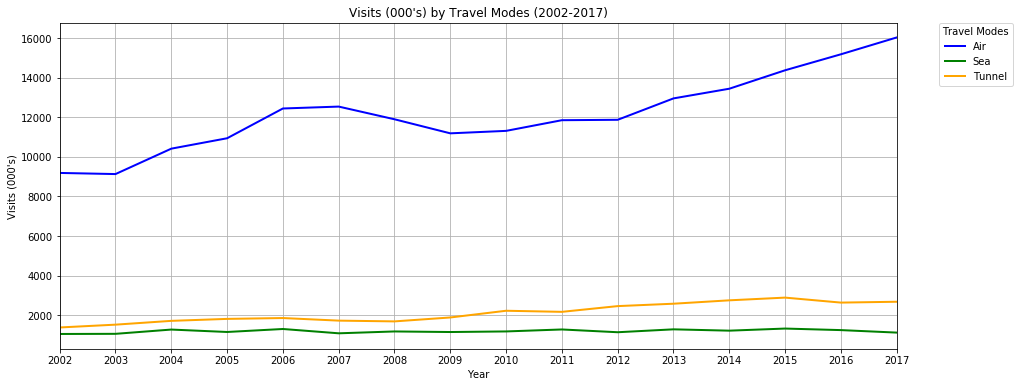

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set base figure size
plt.figure(figsize=(15,6))

# Plot three lines, one for each travel mode
plt.plot("Year", "Air", data=dfQ1, marker='', color='blue', linewidth=2)
plt.plot("Year", "Sea", data=dfQ1, marker='', color='green', linewidth=2)
plt.plot("Year", "Tunnel", data=dfQ1, marker='', color='orange', linewidth=2)

# Label graph and axes
plt.title("Visits (000's) by Travel Modes (2002-2017)", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Visits (000's)")

# Limit x-axis to range of years
plt.xlim(left=2002, right=2017)
plt.xticks(dfQ1["Year"])

# Add gridlines for easier reading
plt.grid()

# Add legend to the right of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title="Travel Modes")

# Draw final graph
plt.draw()

In [8]:
# Print yearly statistics
dfQ1[["Air", "Sea", "Tunnel"]].head(16)

Mode,Air,Sea,Tunnel
Year,,,
2002,9189.240218,1042.468430,1371.673431
2003,9131.972516,1049.884655,1513.893271
2004,10417.474320,1265.800012,1706.056080
2005,10943.642939,1143.363233,1805.562807
2006,12449.636223,1294.460081,1848.549837
2007,12545.826644,1076.222014,1717.722832
2008,11904.054331,1170.009594,1678.929767
2009,11192.648030,1141.129769,1877.520187
2010,11317.297841,1171.018803,2217.224694


In [9]:
# Print summary table
dfQ1[["Air", "Sea", "Tunnel"]].describe()

Mode,Air,Sea,Tunnel
count,16.000000,16.000000,16.000000
mean,12178.339313,1181.846072,2115.884656
std,1934.409914,88.537640,486.467863
min,9131.972516,1042.468430,1371.673431
25%,11130.396757,1126.114604,1714.806144
50%,11890.963316,1170.514199,2019.753539
75%,13082.597417,1266.970983,2587.500757
max,16042.605668,1316.402686,2881.924746


As shown in the graph and summary tables, Air travel has increased substantially between 2002 and 2017, Tunnel travel has increased at a slower rate, and Sea travel has remained relatively stagnant. Air travel has seen an increase of 75% over the 16 year period, with a mean value of 12,178,339 visits. Over that same period, sea travel has remained quite consistent, peaking in 2015 at 1,316,403 visits. Finally, travel via the channel tunnel has seen a steady increase from 2002 to 2017, but is still dwarfed by air travel, with a mean value of only 2,115,885 visits.

A point of interest is the year period 2007 to 2009. We see a decrease in air travel from 12,545,827 visits in 2007 to 11,192,648 visits in 2009. This coincides with the [Global Financial Crisis of 2007-2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008). However, we see no similar impact on tunnel and sea travel, which may indicate the biggest effect was on holiday makers from countries where sea or air travel is not feasible (e.g. the US or Australia).

### On average, which quarter of the year sees the most expenditure?
To see how the average expenditure varies throughout the quarters, a bar chart will be used. The bar chart displays the average expenditure during each quarter, in the year period 2002 to 2017. 

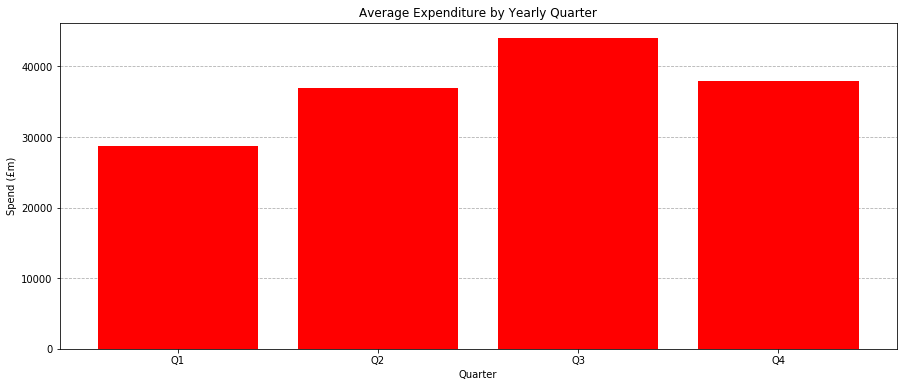

In [10]:
# Set base figure size
plt.figure(figsize=(15,6))

# Plot bar chart
plt.bar("Quarter", "Spend (£m)", data=dfQ2a, color="Red", zorder=3)

# Label graph and axes
plt.title("Average Expenditure by Yearly Quarter", fontsize=12)
plt.xlabel("Quarter")
plt.ylabel("Spend (£m)")

# Add gridlines for easier reading, using zorder to draw them behind the bars
plt.grid(axis="y", zorder=0, linestyle="--")

# Draw final graph
plt.draw()

In [11]:
# Print yearly statistics
dfQ2b[["Q1", "Q2", "Q3", "Q4"]].head(16)

Quarter,Q1,Q2,Q3,Q4
Year,,,,
2002,1115.404029,1492.065494,1793.860714,1550.963668
2003,1212.768609,1394.578557,1883.314557,1526.741000
2004,1334.252242,1673.853718,1893.358114,1696.833417
2005,1478.378063,1732.398842,1885.098891,1886.677716
2006,1520.754340,1990.808949,2410.007956,2035.239128
2007,1667.836329,1959.226990,2475.020720,2171.714342
2008,1642.404649,2095.747282,2369.137845,2088.737410
2009,1666.572291,2118.267337,2424.461452,2087.965659
2010,1668.795788,2283.272307,2475.650286,2375.572347


In [12]:
# Print summary table
dfQ2b[["Q1", "Q2", "Q3", "Q4"]].describe()

Quarter,Q1,Q2,Q3,Q4
count,16.000000,16.000000,16.000000,16.000000
mean,1798.792123,2312.384710,2750.318943,2370.809689
std,446.535411,629.305243,766.984782,583.714336
min,1115.404029,1394.578557,1793.860714,1526.741000
25%,1510.160271,1902.519953,2250.192912,1998.098775
50%,1668.316058,2194.683390,2475.335503,2273.643345
75%,2141.939457,2893.046846,3389.830781,2907.046004
max,2695.710192,3466.500603,4406.575134,3256.904315


The bar chart clearly shows that, on average, quarter 3 sees the most expenditure in the year. Quarter 4 sees the second most, closely followed by quarter 2. Quarter 1 sees the least expenditure by a sizable gap from quarter 3. Quarter 3 coincides with months July, August, and September. These are common months for holidays as schools and colleges usually take their summer holidays around these months. This could lead to an increase in holidaymakers in London during this time, explaining the increase in expenditure in this quarter. 

As expected, there is an large increase in total expenditure for each quarter year-on-year. Similar to the travel modes, there is a small decrease in the years 2007 and 2008, except for quarter 2. This again can be explained by the economic climate at the time. Quarter 3 saw the most expenditure every year apart from 2005, where quarter 4 had around £1m more. In 2012, quarter 3 sees substantially more expenditure than its counterparts, possibly explained by the Olympics being held in London at that time.

From the summary table we can see that every quarter had its max expenditure in 2017, apart from quarter 4 - which had a slight fall from the year previous. On the otherhand, quarters 1 and 3 saw their least expenditure in 2002, while quarters 2 and 4 saw their least the following year.

### How do markets within the G8 compare to the rest of the world?
To analyse how markets compare, a scatter plot will be used. Visits and expenditure will be on the two axes, with the market being a dot where its two values intersect. G8 markets will be labelled, with the rest of the regions being overlayed.

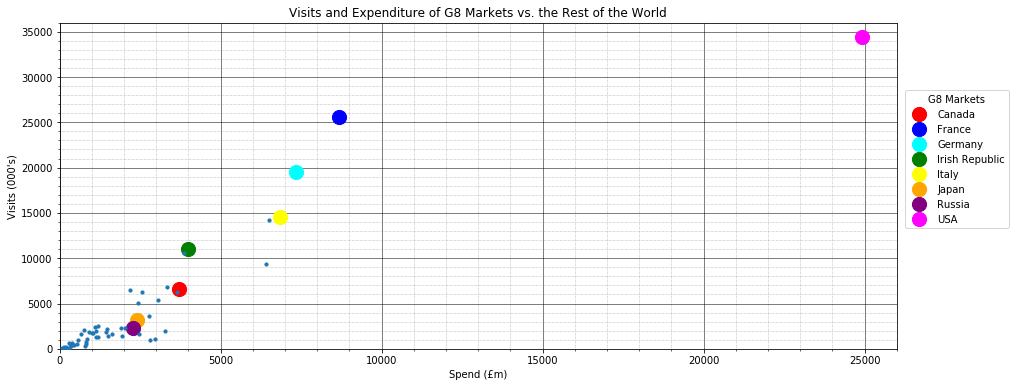

In [13]:
# Array for colours to label markets
colour = ["Red", "Blue", "Aqua", "Green", "Yellow", "Orange", "Purple", "Magenta"]

# Generate base figure
fig, ax = plt.subplots(figsize=(15,6))

# For loop to add countries individually and assign colours
for x in range(8):
    ax.scatter(dfQ3a.iloc[x]["Spend (£m)"], dfQ3a.iloc[x]["Visits (000's)"], c=colour[x], s=200,
               label=dfQ3a.iloc[x]["Market"], zorder=3)

# Add Legend
ax.legend(bbox_to_anchor=(1.01, 0.37), loc=3, borderaxespad=0, title="G8 Markets")

# Add gridlines for easier reading, using zorder to draw them behind the dots
ax.grid(zorder=0)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# Label graph and axes
plt.title("Visits and Expenditure of G8 Markets vs. the Rest of the World", fontsize=12)
plt.ylabel("Visits (000's)")
plt.xlabel("Spend (£m)")

plt.scatter("Spend (£m)", "Visits (000's)", data=dfQ3b, s=10, zorder=3)

# Limit x-axis to range of years
plt.xlim(left=0, right=26000)
plt.ylim(bottom=0, top=36000)

# Draw final graph
plt.show()  

In [14]:
# Summary table of G8 markets (inc. Ireland, exc. UK)
dfQ3a.describe()

,Spend (£m),Visits (000's)
count,8.000000,8.000000
mean,7521.891225,14633.521273
std,7421.124167,11309.569221
min,2280.773897,2251.041349
25%,3374.668140,5713.039414
50%,5420.998108,12834.703946
75%,7678.785469,20990.114401
max,24926.392100,34392.219047


In [15]:
# Summary table of the remaining markets
dfQ3b.describe()

,Spend (£m),Visits (000's)
count,47.000000,47.000000
mean,1643.918405,2524.065806
std,1460.423329,2994.725635
min,79.055240,96.412317
25%,617.214796,634.803697
50%,1128.743365,1616.166325
75%,2445.566730,2354.025474
max,6498.405264,14254.992030


In [16]:
# From the graph, there are two outliers in the rest of the world markets
# Find first outlier
ol1 = dfQ3b["Spend (£m)"].max()
dfol1 = dfQ3b[dfQ3b["Spend (£m)"] == ol1]

# Find second outlier
dfol2 = dfQ3b[~(dfQ3b["Spend (£m)"] == ol1)]
ol2 = dfol2["Spend (£m)"].max()
dfol2 = dfQ3b[dfQ3b["Spend (£m)"] == ol2]

# Concantenate DataFrames and print
frames1 = [dfol1, dfol2]
dfMax = pd.concat(frames1)
dfMax[["Spend (£m)", "Visits (000's)"]].head()

,Spend (£m),Visits (000's)
Market,,
Spain,6498.405264,14254.992030
Australia,6394.865264,9334.664615


In [17]:
# Find the least impactful markets
# Market with least spend
minMarket1 = dfQ3b["Spend (£m)"].min()
dfMinSpend = dfQ3b[dfQ3b["Spend (£m)"] == minMarket1]

# Market with least visits
minMarket2 = dfQ3b["Visits (000's)"].min()
dfMinVisits = dfQ3b[dfQ3b["Visits (000's)"] == minMarket2]

# Concantenate DataFrames and print
frames2 = [dfMinSpend, dfMinVisits]
dfMin = pd.concat(frames2)
dfMin[["Spend (£m)", "Visits (000's)"]].head()

,Spend (£m),Visits (000's)
Market,,
Serbia,79.055240,117.241855
Oman,185.105368,96.412317


To no surprise, the majority of the G8 markets rank higher than the majority of the rest of the markets in terms of visits and expenditure. The largest market is clearly the United States, with £24,926,392,100 spent in the years 2002 to 2017. The next closest in terms of total spending is France, with a little under £9 billion. From the graph we can see that Americans spend more per visit than the rest of the G8 markets, as it is further across on the x-axis relative to its placement on the y-axis.
The two Asian markets, Russia and Japan, are the least and second least impactful markets from the G8 subgroup respectively. Although they still outweigh the majority of the rest of the world.

The mean value of Spend (£m) in the rest of the world is less than that of the minimum value in the G8 markets, while the mean of the Visits (000's) is just barely more than that of the corresponding field in the G8 market. There are two outliers in this group, which were found to be Spain and Australia. The two least impactful markets were found to be Serbia (in terms of Spend (£m)) and Oman (in terms of Visits (000's)). Besides the two outliers, no market in this dataset had more than £4 billion in spending or 6 million visits.

The disparity between the two North American countries - Canada and the US -  is interesting. One might think that the [Commonwealth of Nations](https://en.wikipedia.org/wiki/Commonwealth_of_Nations) member would be more impactful than the other, as it is heavily linked with the UK. However this is clearly not the case. Canada is suprisingly less impactful than one might imagine. When compared with another Commonwealth of Nations member, Australia, this is evident. Australia was one of the two outliers within the second subgroup, with more than £2 billion more in spending versus Canada. Even though Canada has approximately [12 million more people than Australia](https://www.indexmundi.com/g/r.aspx) and an average flight time of [8 hours](https://www.prokerala.com/travel/flight-time/from-london/to-ottawa/) versus [the 25 hour trip](https://www.prokerala.com/travel/flight-time/from-london/to-canberra/) from Australia, Canada still sends less visitors to London.

### Further Analysis
With such a detailed and comprehensive dataset, there is certainly a hugh amount of further analysis that could be undertaken. Three examples include:
* Looking at how the tendencies of indivdual markets have changed throughout the years (e.g. Ireland or France)
* Which purpose for travel leads to the most expenditure (Business, Holiday, Study, VFR (visitng friends or relatives), or Miscellaneous)?
* On average, does expenditure increase consistently with duration of stay? Does staying for longer than 15 days have an impact on spending?